In [ ]:
import numpy as np
import pandas as pd
import matplotlib
%matplotlib inline
import matplotlib.pylab as plt
import seaborn as sns
import random
import tensorflow as tf
tf.compat.v1.disable_v2_behavior()
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, LSTM, GRU
import math
from tensorflow.keras.utils import Sequence
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, precision_recall_curve, auc, classification_report, roc_auc_score, average_precision_score, confusion_matrix, accuracy_score
!pip3 install eli5
!pip install shap
import eli5
from eli5.sklearn import PermutationImportance
import shap
from google.colab import drive 

Instructions for updating:
non-resource variables are not supported in the long term
     |████████████████████████████████| 106 kB 5.2 MB/s 
     |████████████████████████████████| 371 kB 5.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for shap: filename=shap-0.40.0-cp37-cp37m-linux_x86_64.whl size=509239 sha256=e06ffa4a156c223d97f0b37d465c89de02bd60f6ec8f5a4d0225b762c8332c59
  Stored in directory: /root/.cache/pip/wheels/ec/35/84/e304841ac4b910bc95fe9a6e5302eb2507b4333728851dcbfb
Successfully built shap


In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 데이터 로딩
df = pd.read_csv('/content/drive/Shareddrives/생체EMR 5팀/Data/MIMIC-III/MIMIC3_HB_Event.csv')
df = df[['hadm_id', 'age', 'charttime', 'valuenum', 'event']]
df

,hadm_id,age,charttime,valuenum,event
0,145834,76,2101-10-20 19:26:00,7.8,1
1,145834,76,2101-10-20 19:59:00,8.2,0
2,145834,76,2101-10-21 03:00:00,9.7,0
3,145834,76,2101-10-21 19:06:00,10.4,0
4,145834,76,2101-10-22 04:00:00,9.5,0
...,...,...,...,...,...
362207,158319,28,2131-01-27 06:30:00,10.8,0
362208,158319,28,2131-01-28 12:34:00,9.5,1
362209,158319,28,2131-01-29 05:58:00,10.5,0
362210,158319,28,2131-01-30 08:55:00,10.1,0


In [ ]:
hadm_id =list(set(df['hadm_id'].tolist()))
column_name = ['age', 'charttime', 'valuenum', 'event']
x = [df[df['hadm_id']==i][column_name].to_numpy() for i in hadm_id]

In [ ]:
a = []
b = []
for i in range(9):
  a.append(x[i][:,1])
  b.append(x[i][:,2])

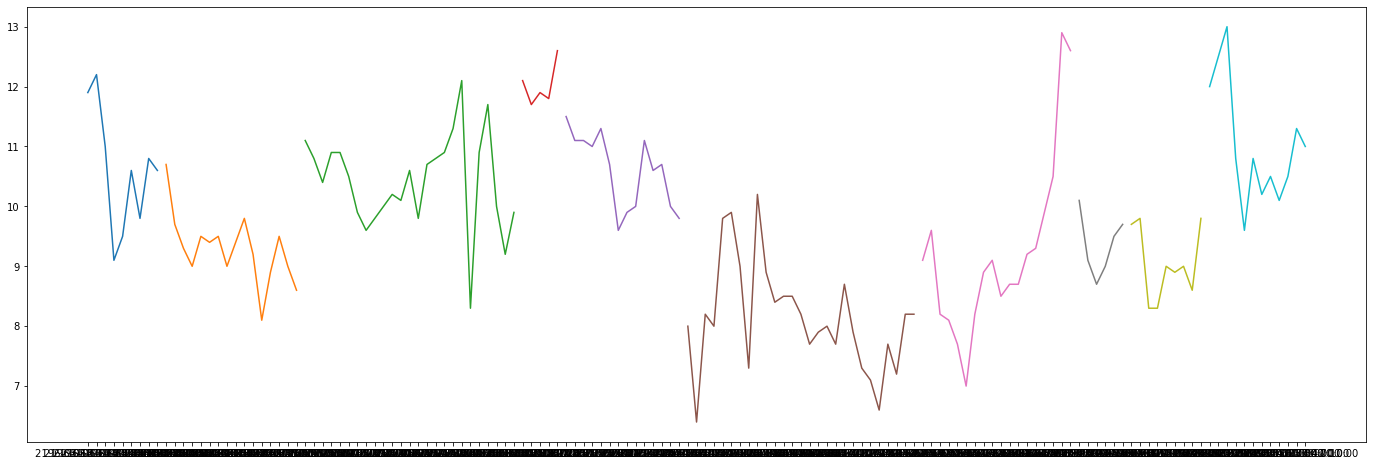

In [ ]:
plt.figure(figsize=(24,8))
for i,j in zip(a,b):
  plt.plot(i,j)

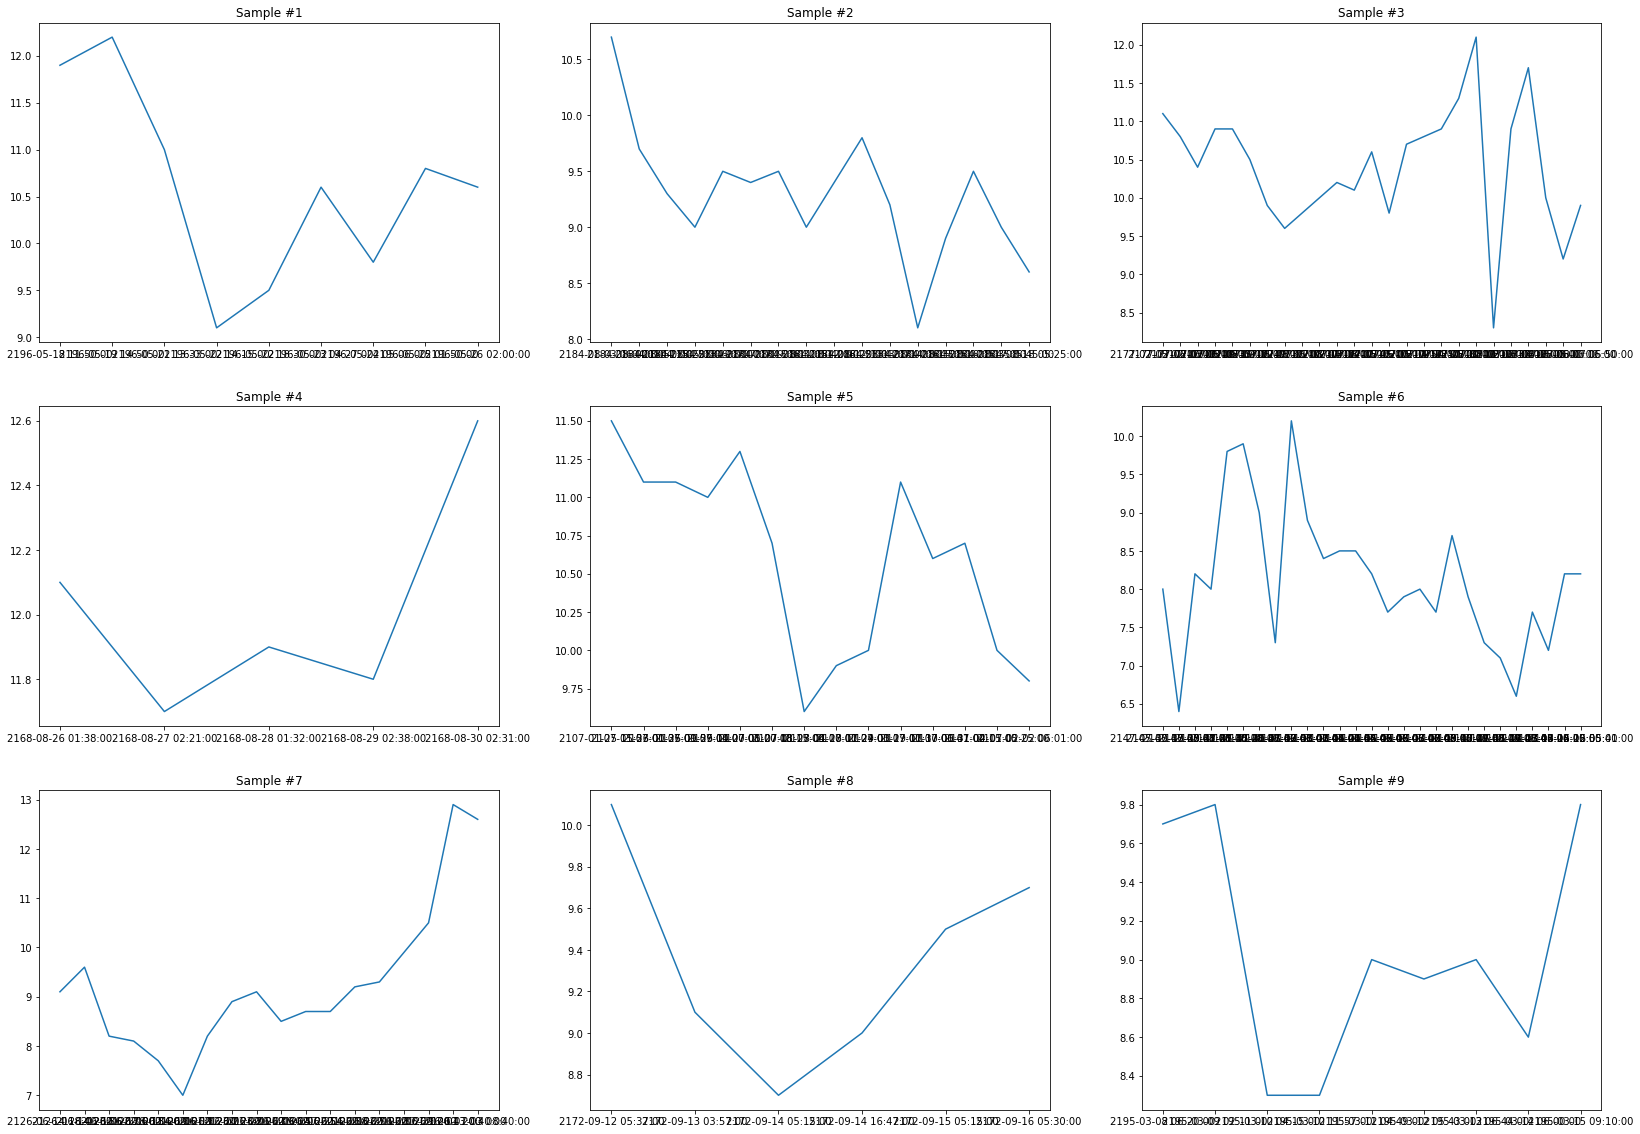

In [ ]:
#colours=['#FF5733','#678BFC','#20D930', '#A64909', '#D920C8', '#7733F8', '#E451A5', '#AD6A0F', '#FF5733', '#FA5980', '#08BFB1']
ncol = 3; nrow = 3
npanels = ncol*nrow
fig = plt.figure() 
fig.set_size_inches(28,20) 
for i in range(1,npanels+1,1):          
    ax1 = fig.add_subplot(nrow,ncol,i)   
    ax1.plot(a[i-1],b[i-1])                
    axtit = "Sample #{}".format(i)
    ax1.set_title(axtit,fontsize=12)